# PART 1: The Problem Statement/Business Case

Introduction:
- Marketing is crucial for the growth and sustainability of any business.
- Businesses can help build their brand, engage customers and grow revenue. 
- A key pain point for businesses is knowing their customers and identifying their needs.
- By understanding the customer, companies can launch a targeted marketing campaign that is tailored for specific needs.
- With available data, machine learning algorithms can be applied to perform customer/market segmentation.

Problem Statement:
- In this project, we will be acting as advisers to a New York city bank.
- We have sourced extensive data dating back 6 months from the client. 
- The marketing team is looking to launch a targeted ad marketing campaign by dividing their customers into 3 unique niches.

Approach:
- Considering the nature of the business problem and the absence of a label/dependent variable in question, we can conclude this is an UNSUPERVISED LEARNING problem.
- As such, it would require a clustering algorithm or a combination of clustering algorithms.
- Our first method adopt a simple KMeans model to find an optimal number of customer clusters.
- For our second method, we'll adopt the PCA algorithm to perform some dimensionality reduction and attach the generated clusters from the first method to the new components.
- In our third and final method, the original dataset would then be fed into an AUTOENCODER network for another round of dimensionality reduction.
- KMeans will be applied on the resulting dataset and the new components to generate new clusters.
- We will run a PCA model on the decoded datatset for a final round of dimensionality reduction.
- The clusters from the KMeans will then be attached to our final components.

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata 

# PART 2: Dataset and Library Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science for Business/Marketing_data.csv')

In [ ]:
# Preview the first five rows from the dataset
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Description of our features:**

- CUSTID: Identification of Credit Card holder 
- BALANCE: Balance amount left in customer's account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user  
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

In [ ]:
# Statistical Overview/Description of the Dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**OBSERVATIONS FROM THE STATISTICAL DESCRIPTION:**

1. The mean balance is USD1,564.
2. Customer balances are updated frequently with a frequency score of around 0.9.
3. The bank has a loyal customer base with an average tenure of 11 years.
4. Purchases average around USD1,000 with a customer spending as much as USD49,000. This would suggest there's room for growth in customer purchases.
5. The mean cash advance is USD978. With a max figure of USD47k, the bank can grow its payments revenue by incentivising more customer purchases through increased cash advances. 

Common areas for concern include:
1. Purchases Frequency - At 0.49, customers purchases are not very regular.
2. Cash Advance Frequency - This number (0.13) is abysmall considering the bank's bread and butter (key business) is customer lending.
3. Cash Advance Transactions - As low as this number is, an inference cannot be made in isolation. We have to interpret in the context of purchase transactions.
4. Purchases Transactions - With a ratio of 1: 4.6, we can infer that customers are spending less with cash advances than they are with their own money. This figure is also discouraging for the bank's lending business.
5. Full Payment Percent: We can re-examine cash advance frequency in the context of payment. A FP% avg figure of 15% would suggest the bank is contracting customer lending (0.13) because customers are finding hard to pay back their loans. 


# PART 3: Exploratory Data Analysis/Data Visualisation

Let's see of we have any missing data.

We can observe this with a heatmap or with a for-loop.

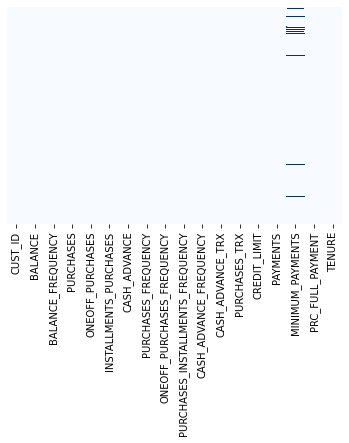

In [ ]:
# METHOD 1: HEATMAP
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
# METHOD 2: FOR-LOOP
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

CUST_ID - 0.0%
BALANCE - 0.0%
BALANCE_FREQUENCY - 0.0%
PURCHASES - 0.0%
ONEOFF_PURCHASES - 0.0%
INSTALLMENTS_PURCHASES - 0.0%
CASH_ADVANCE - 0.0%
PURCHASES_FREQUENCY - 0.0%
ONEOFF_PURCHASES_FREQUENCY - 0.0%
PURCHASES_INSTALLMENTS_FREQUENCY - 0.0%
CASH_ADVANCE_FREQUENCY - 0.0%
CASH_ADVANCE_TRX - 0.0%
PURCHASES_TRX - 0.0%
CREDIT_LIMIT - 0.000111731843575419%
PAYMENTS - 0.0%
MINIMUM_PAYMENTS - 0.034972067039106144%
PRC_FULL_PAYMENT - 0.0%
TENURE - 0.0%


MINIMUM_PAYMENTS is missing data in 313 rows at 3.5% of the entire dataframe.

CREDIT_LIMIT is missing data in 1 row at 0.011% of the entire dataframe.

We are going to fill in these missing values with the average values of their corresponding features/columns.

In [ ]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [ ]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [ ]:
# Quick check on our fill operations
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

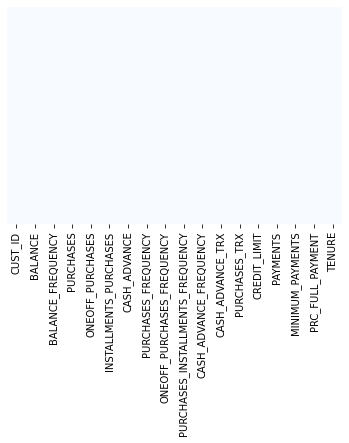

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

Check for duplicate entries:

In [ ]:
df.duplicated().sum()

0

Let's drop CUST_ID since it will have no meaningful in our models.

In [ ]:
df = df.drop('CUST_ID', axis=1)

In [ ]:
df.head(1) # CUST_ID no longer exists in our dataframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


**DISTRIBUTION/KDE PLOTS FOR ALL OUR FEATURES**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

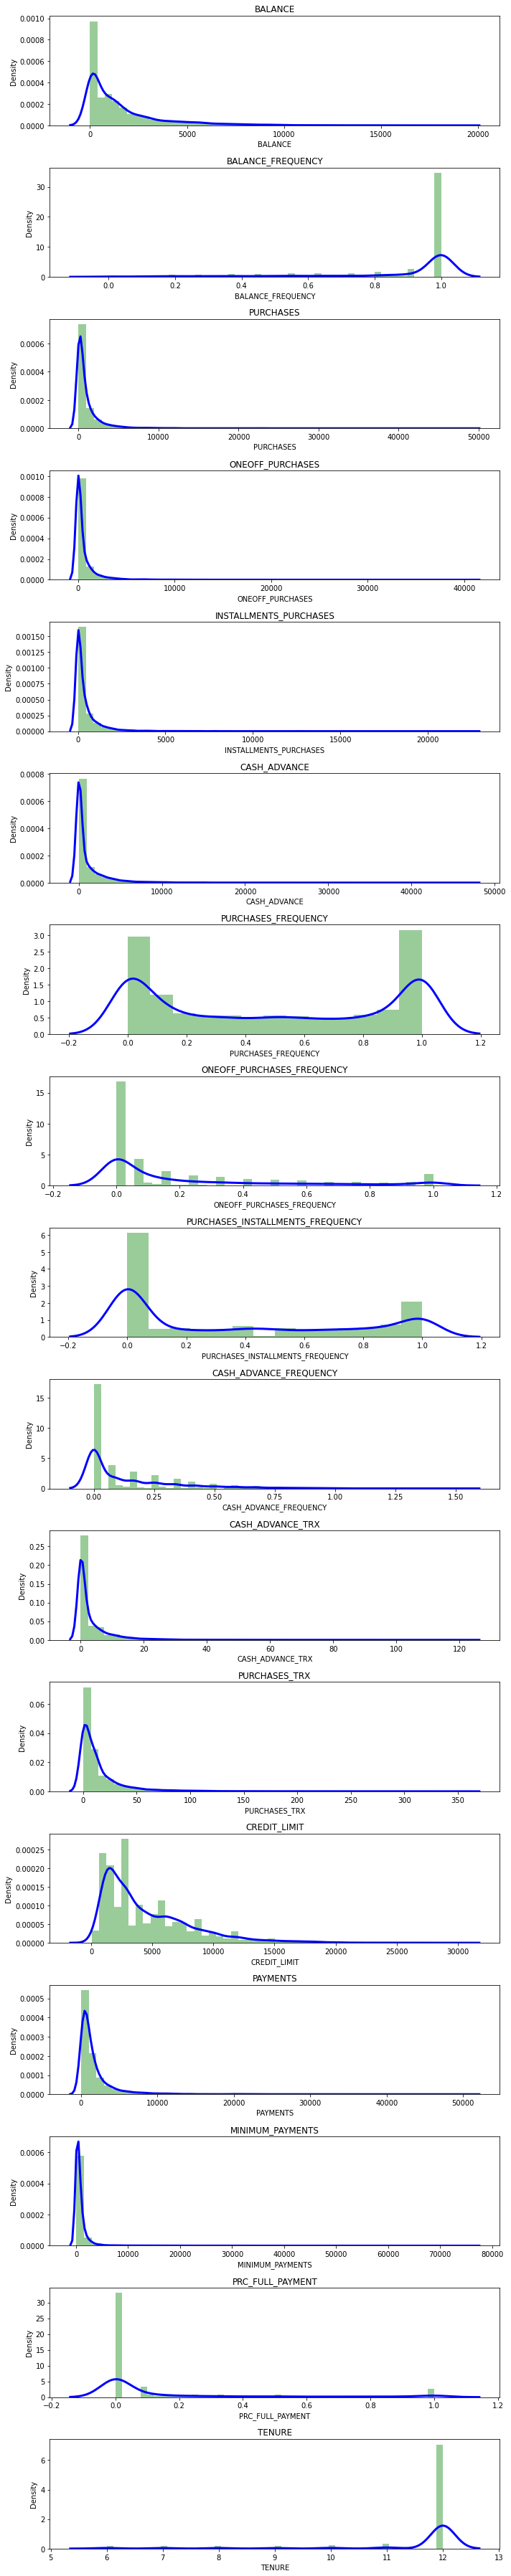

In [ ]:
plt.figure(figsize = (10, 50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws = {'color':'g'})
    plt.title(df.columns[i])

plt.tight_layout()

There are 2 observable clusters in purchases frequency. We have customers with zero to little purchases frequency (0.0 - 0.19) and customers who make purchases very frequently (0.95 - 1.0). Let's see how significant the customers who make the most frequent purchases are to the overall customer base.

In [ ]:
most_frequent_purchasers = len(df[df['PURCHASES_FREQUENCY'] >= 0.95]) # Customer rows where PURCHASES_FREQUENCY are at or above 0.95
customer_count = len(df) # All the customers in the dataframe
most_frequent_purchaser_pct = most_frequent_purchasers / customer_count

print('Most Frequent Purchaser Pct: {}%'.format(most_frequent_purchaser_pct * 100))

Most Frequent Purchaser Pct: 24.335195530726256%


The most frequent customers only make up 24% of the entire customer base according to the dataset. This is because the customers between the two noticeable clusters identified earlier also make up a significant fraction.

In [ ]:
purchase_frequencies_in_the_middle = len(df[(df['PURCHASES_FREQUENCY'] >= 0.19) & (df['PURCHASES_FREQUENCY'] <= 0.95)]) # Customers between both frequency clusters
middle_purchaser_frequency_pct = purchase_frequencies_in_the_middle / customer_count
print('Middle Purchaser Frequency: {}%'.format(middle_purchaser_frequency_pct * 100))

Middle Purchaser Frequency: 39.08379888268156%


39% of the customers lie between the two purchase frequency clusters.

Also notice most of the features have outliers that extend well beyond their different clusters.

Let's explore some correlations between our features:

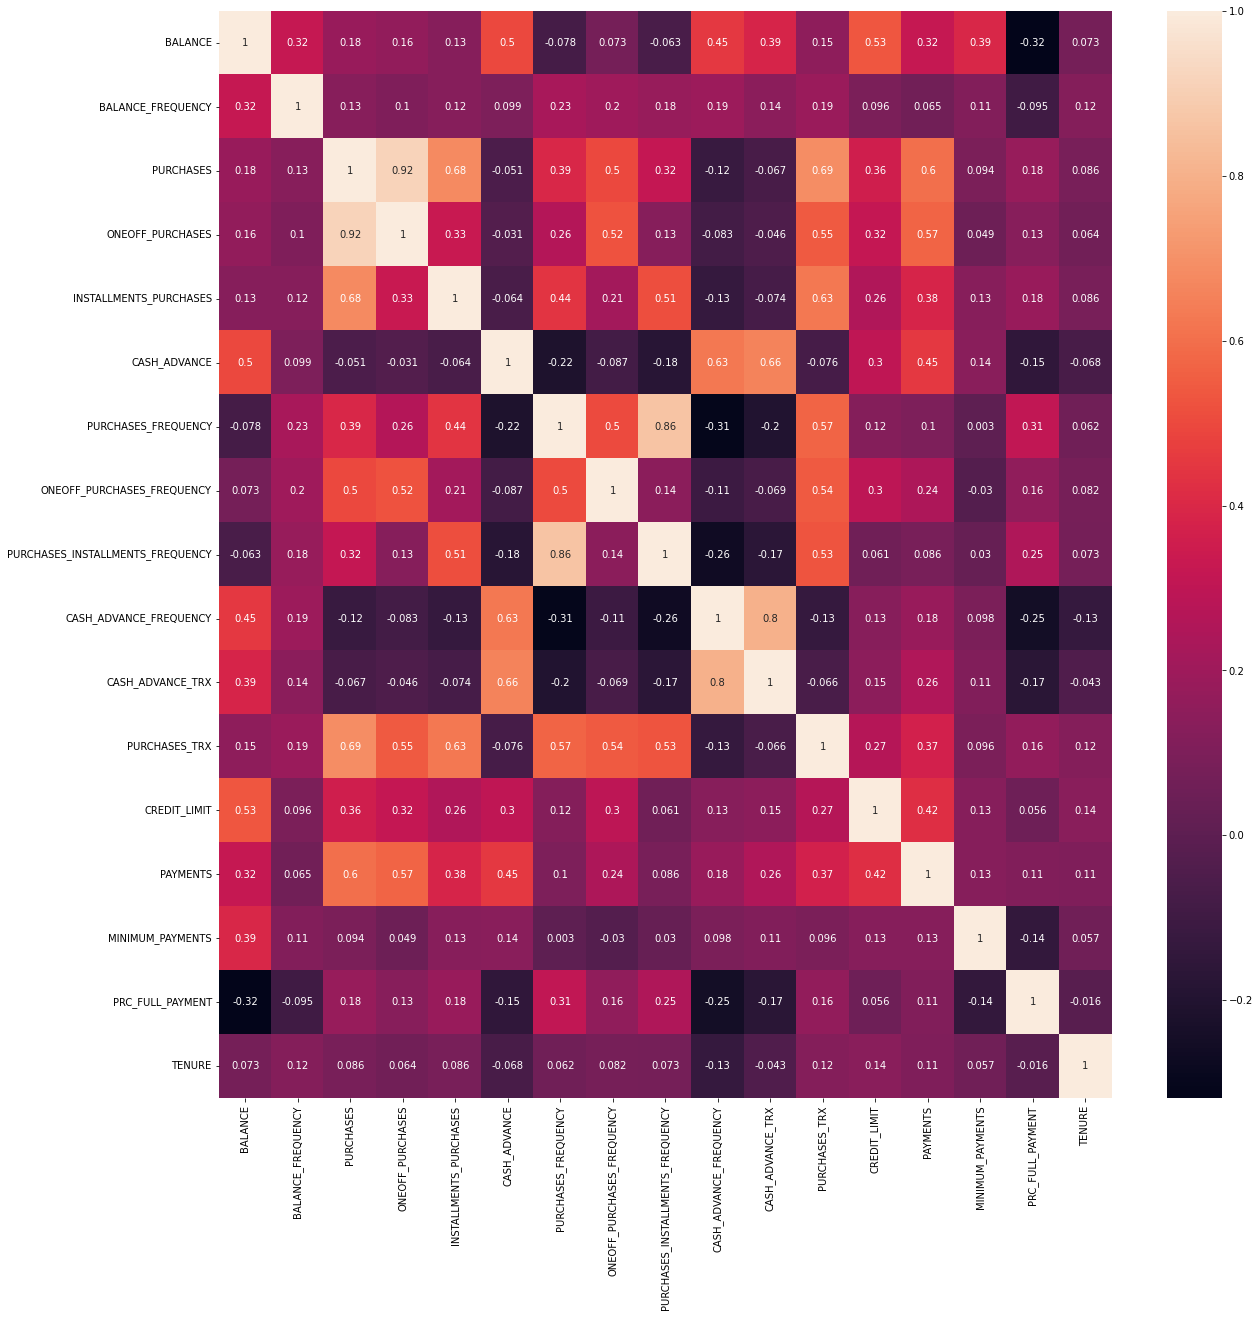

In [ ]:
correlations = df.corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

'PURCHASES' has a 0.92 correlation with 'ONE_OFF_PURCHASES'. Customers with high purchase amounts have correspondingly high maximum amounts of one-go purchases.




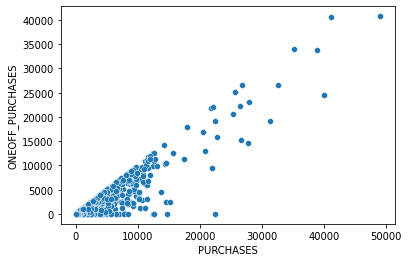

In [ ]:
sns.scatterplot(x = 'PURCHASES', y = 'ONEOFF_PURCHASES', data=df)

'PURCHASES_FREQUENCY' has a 0.86 correlation with 'PURCHASES_INSTALLMENTS_FREQUENCY'. Customers who purchase frequently make a habit of installemental purchases.

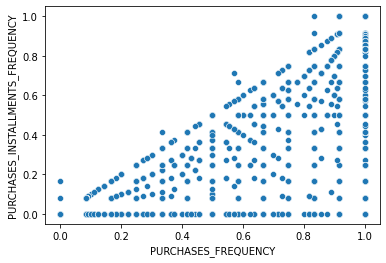

In [ ]:
sns.scatterplot(x = 'PURCHASES_FREQUENCY', y = 'PURCHASES_INSTALLMENTS_FREQUENCY', data=df)

'PURCHASES' has a 0.6 correlation with 'PAYMENTS'. Customers with the highest purchases amounts also have the highest payments. This correlation, however, does not translate into the 'PRC_FULL_PAYMENT' feature. It would seem purchases aren't indicative of full payment customer behaviour at 0.18.

Considering the average purchase frequency itself is low, we can infer that the payments frequencies aren't adequate enough for a high full payment percentage.

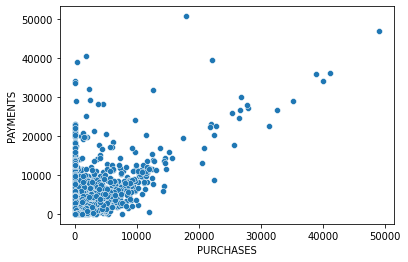

In [ ]:
sns.scatterplot(x = 'PURCHASES', y = 'PAYMENTS', data=df)

# PART 4: KMeans Clustering

In this section, we will train a KMeans model/algorithm that will group customer datapoints with similar attributes into different clusters/categories. 

Note that all our features are continuous in nature. The dataset doesn't have any categorical feature(s) (e.g. gender,age, location, etc..) where our segmentation would ideally have started from.

Without these categorical features to start with, we have to defer to models to find attributes that can define different customer clusters.

**Step 1: Feature Scaling.**

The first step in our process is scaling our data so each feature is given equal numeric priority in our model. The idea is to compare all our features on equal footing.

In [ ]:
# Instantiate the scaler object 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data = df_scaled, columns = df.columns)

In [ ]:
# Let's review our scaled dataset
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [ ]:
# To confirm our scaling operation, we can observe the mean and std values of our features from their statistical summaries
df_scaled.describe().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.75,-3.70,-0.47,-0.36,-0.45,-0.47,-1.22,-0.68,-0.92,-0.68,-0.48,-0.59,-1.22,-0.60,-0.37,-0.53,-4.12
25%,-0.69,0.05,-0.45,-0.36,-0.45,-0.47,-1.01,-0.68,-0.92,-0.68,-0.48,-0.55,-0.80,-0.47,-0.30,-0.53,0.36
50%,-0.33,0.52,-0.30,-0.33,-0.36,-0.47,0.02,-0.40,-0.50,-0.68,-0.48,-0.31,-0.41,-0.30,-0.23,-0.53,0.36
75%,0.24,0.52,0.05,-0.01,0.06,0.06,1.06,0.33,0.97,0.44,0.11,0.09,0.55,0.06,-0.00,-0.04,0.36
max,8.40,0.52,22.48,24.20,24.43,22.01,1.27,2.67,1.60,6.82,17.55,13.81,7.01,16.92,32.42,2.89,0.36


**Step 2: Finding K.**

The second step in our process is finding an optimal K. i.e. an optimal number of clusters. Our choice would be determined by the elbow method. The idea is to find a k value with a low enough WCSS - Within Cluster Sum of Squares.

In [ ]:
scores_1 = [] # List to hold our WCSS figures at different values for k
range_values = range(1,20) # Range of possible values for our k 

# Train the KMeans model for all the numbers in range_values
for i in range_values:
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

Text(0, 0.5, 'Scores WCSS')

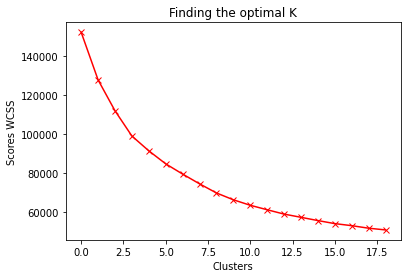

In [ ]:
# Plot our WCSS scores
plt.plot(scores_1, 'rx-')
plt.title('Finding the optimal K')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')

We can infer from the plot that a k-value above 8 wouldn't be optimal in a WCSS context and a k-value outside 8 would be model 'overkill'.

Also, customer clusters beyond 8 might require an expansive budget and more resources from the bank. Customer retention budgets are typically very tight and controlled.

**Step 3: Train the model for 8 clusters.**

Pretty self-explanatory.

In [ ]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

Our model has produced 8 cluster centers as expected. However, to understand their attributes, we have to perform an inverse tranformation.

In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])

In [ ]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1275.335601,0.971908,2157.989597,1705.979347,452.010250,282.313613,0.883484,0.770700,0.431454,0.052040,0.977639,30.025045,6056.285575,2147.505917,492.661139,0.285230,11.876565
1,869.441195,0.795307,387.463654,236.537740,151.406683,1120.452630,0.408737,0.116973,0.274915,0.196992,3.254808,5.068910,2445.535977,596.186218,376.937132,0.157627,7.233974
2,5020.246610,0.971112,522.254961,324.911564,197.457762,5147.323590,0.295098,0.138867,0.195464,0.518090,16.295838,7.898763,8163.897126,4016.230701,2064.503360,0.037926,11.616423
3,803.899748,0.955847,927.571196,190.057911,737.958589,216.675636,0.890105,0.088041,0.844701,0.040458,0.793121,19.437687,3550.084846,1109.623716,743.517444,0.246903,11.859422
4,3762.436640,0.988237,6199.766676,3533.304973,2668.110055,669.916456,0.959341,0.660427,0.872985,0.080561,2.266484,91.164835,9133.241758,5862.758729,2570.034179,0.223396,11.969780
5,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
6,105.142733,0.369137,339.826850,202.393548,137.684615,308.328143,0.267250,0.070218,0.189459,0.030962,0.682472,4.280271,3862.692163,1177.527380,266.575133,0.237218,11.784928
7,1578.775761,0.972866,242.106373,192.171783,50.115005,762.045640,0.149770,0.085220,0.065742,0.152894,2.983595,2.765585,3373.629846,998.429198,835.377994,0.020326,11.884069


In [ ]:
# Let's concatenate our clusters/labels to our dataframe
df_cluster = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis =1)

In [ ]:
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


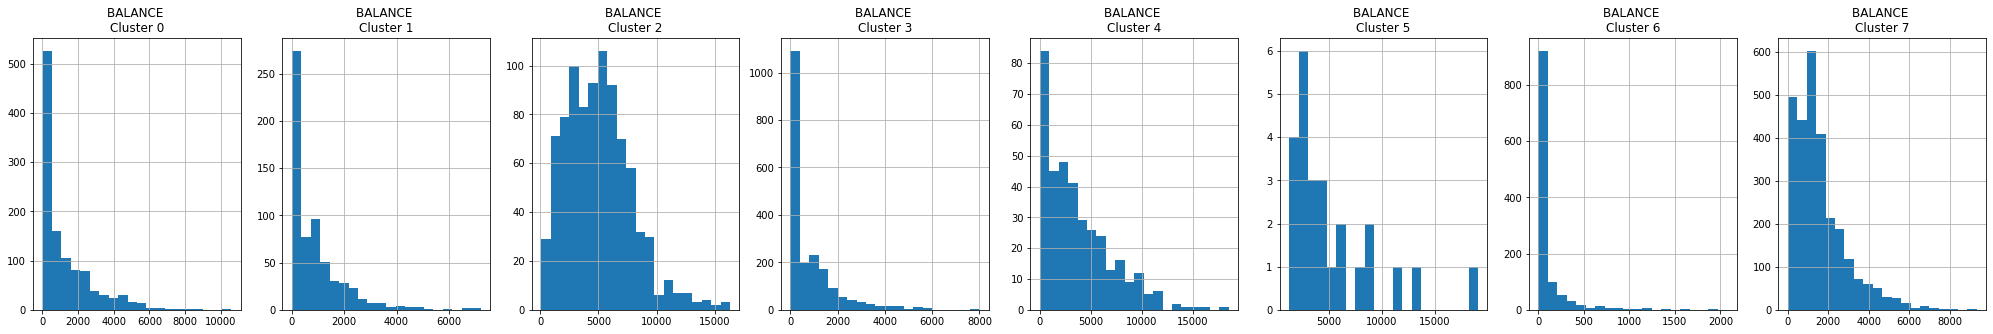

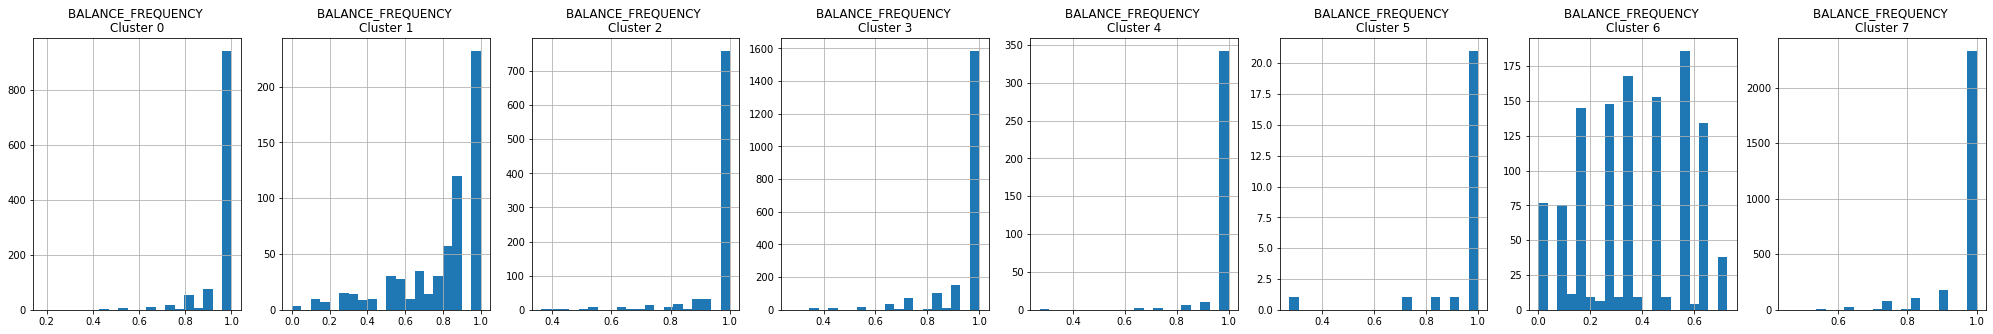

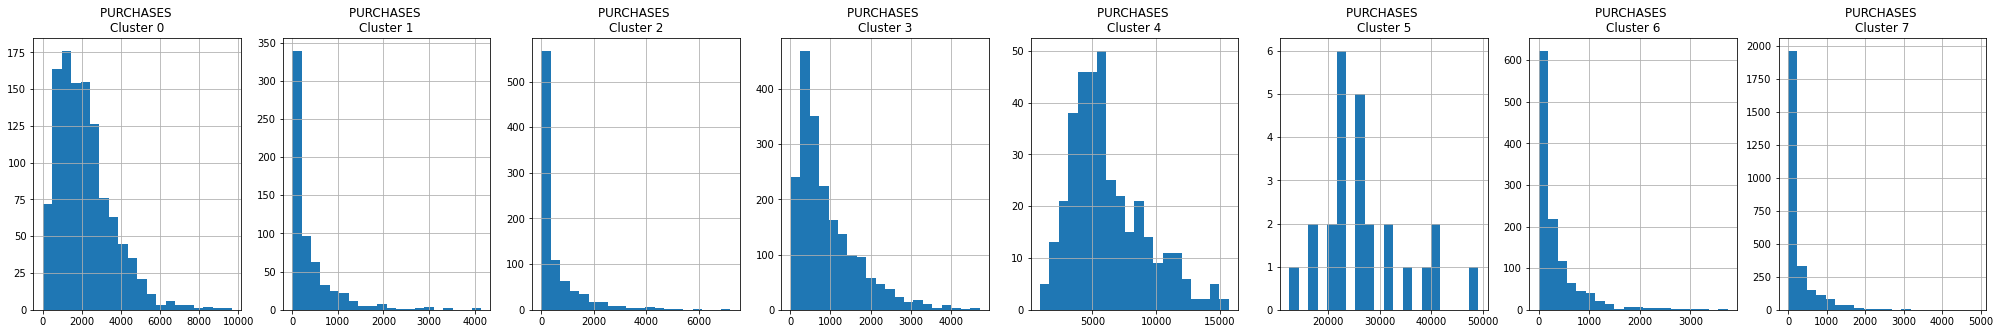

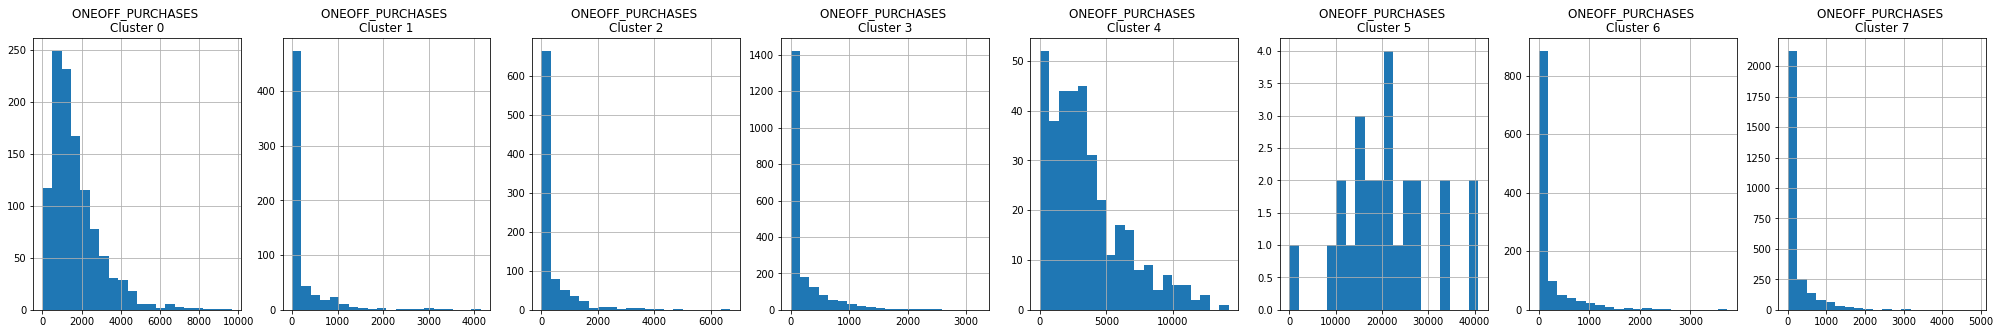

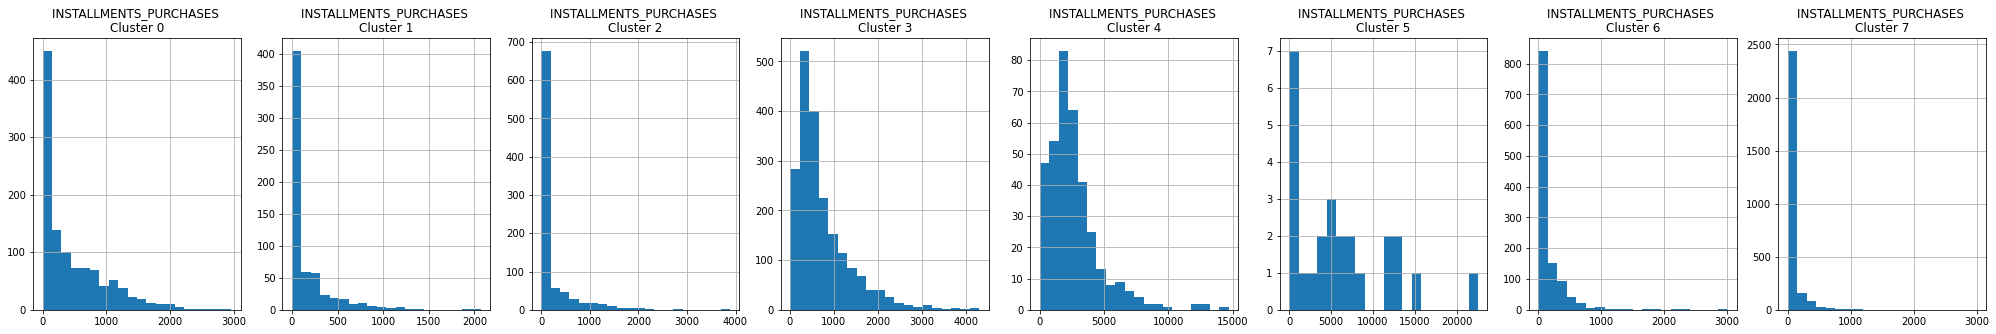

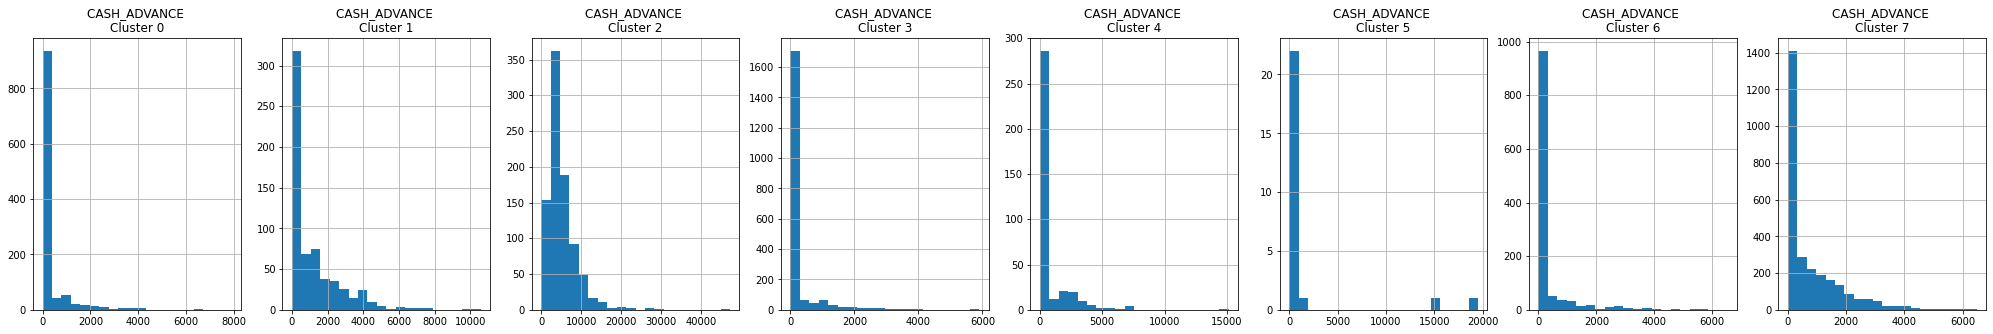

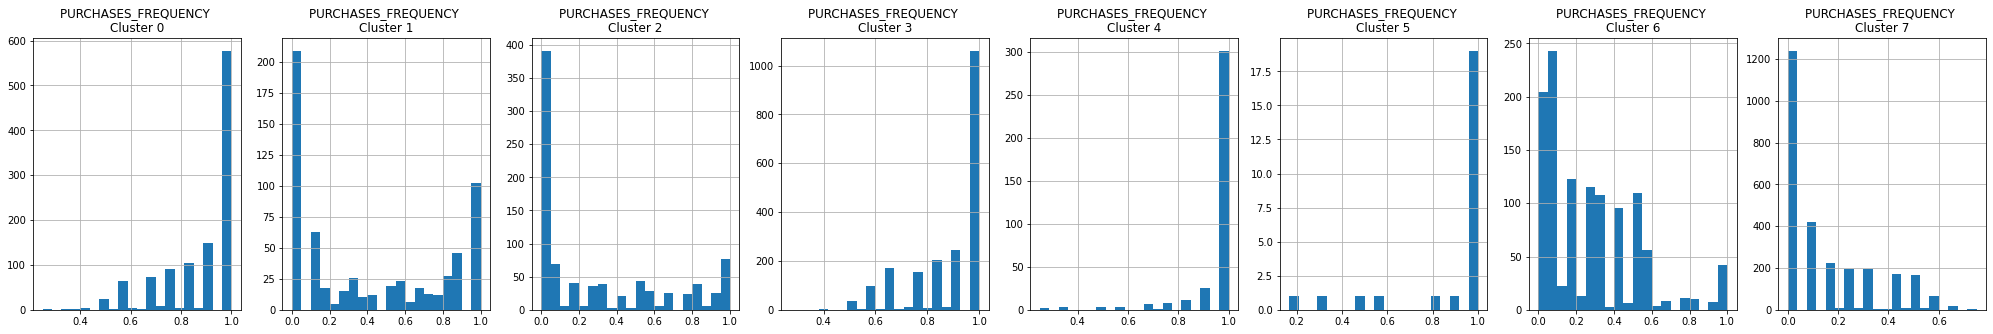

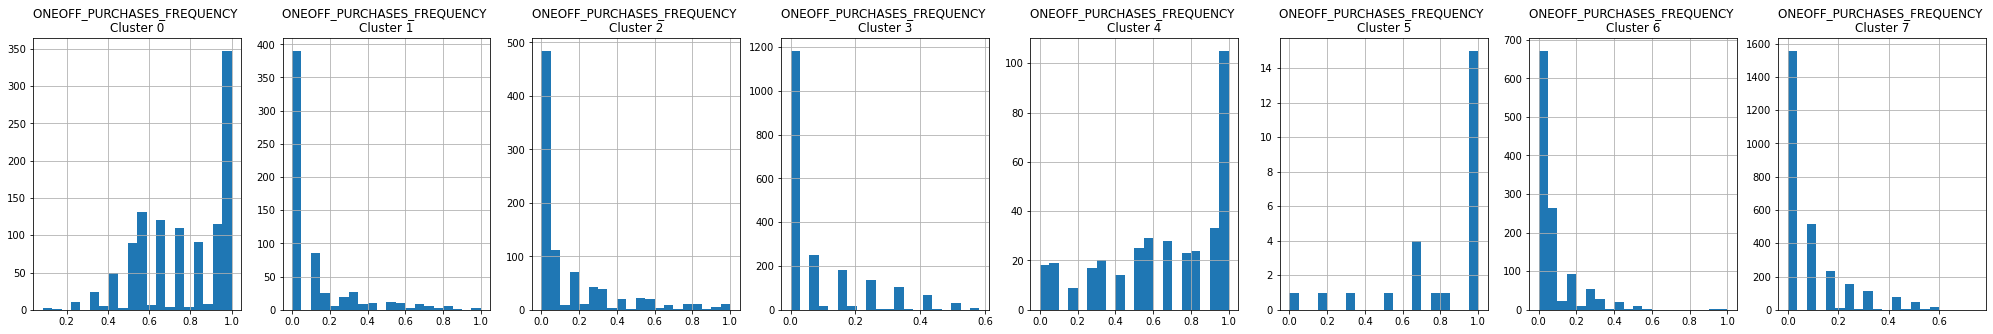

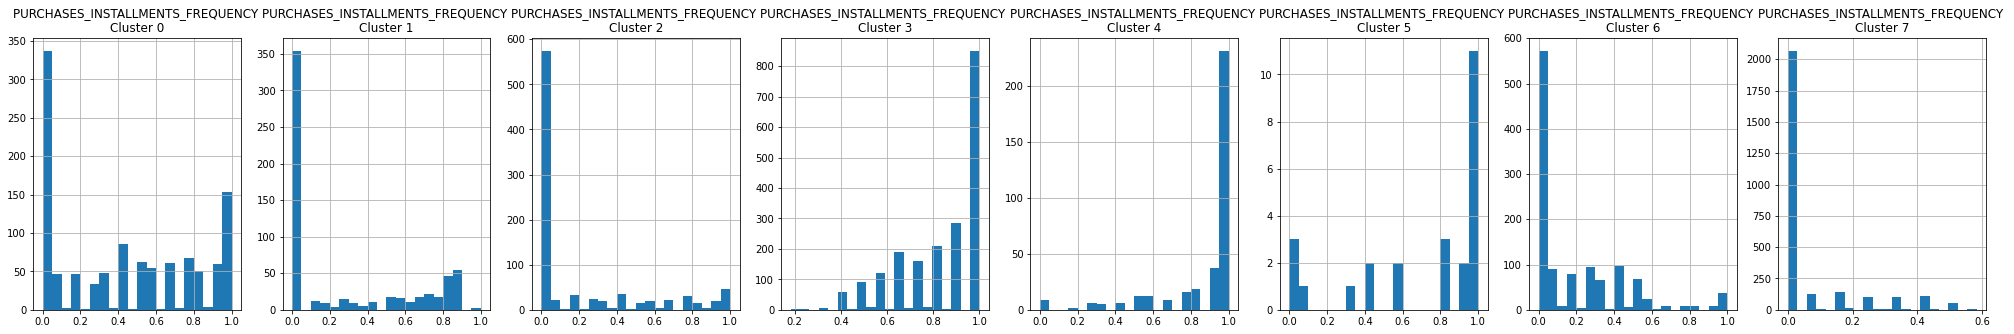

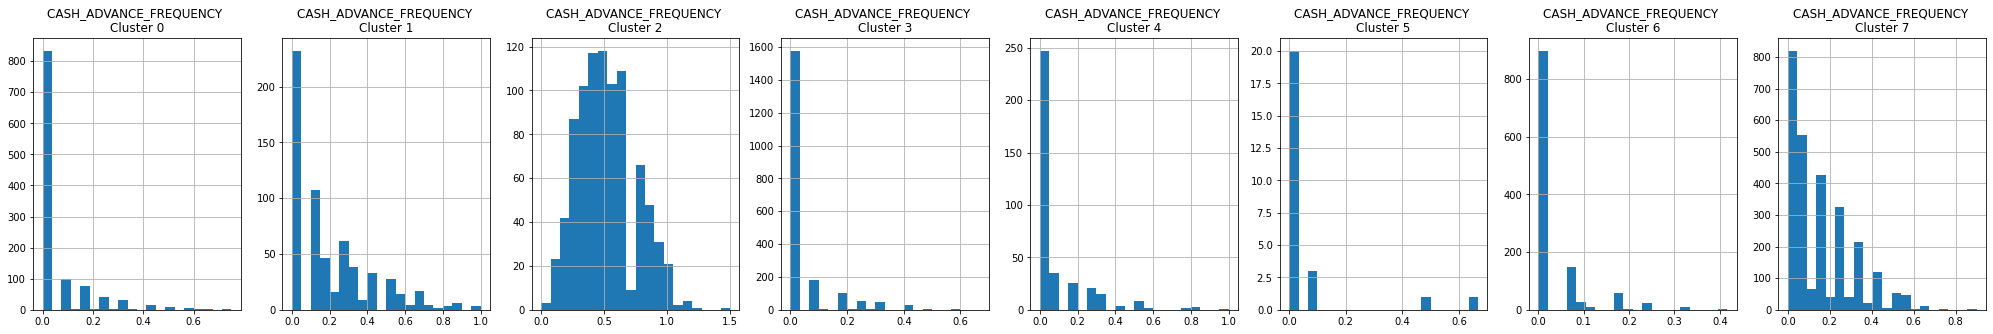

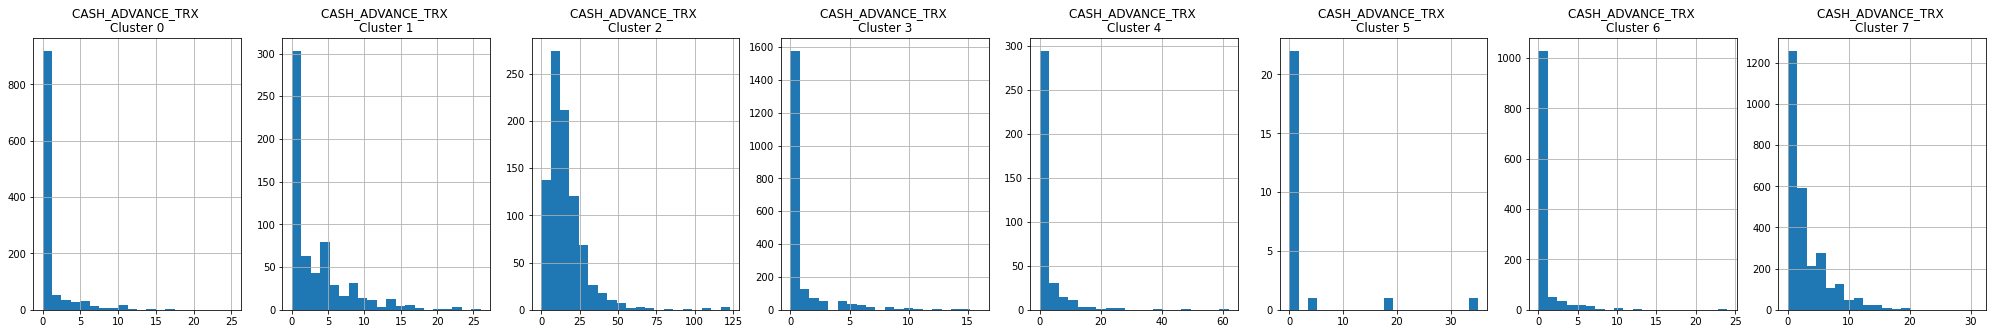

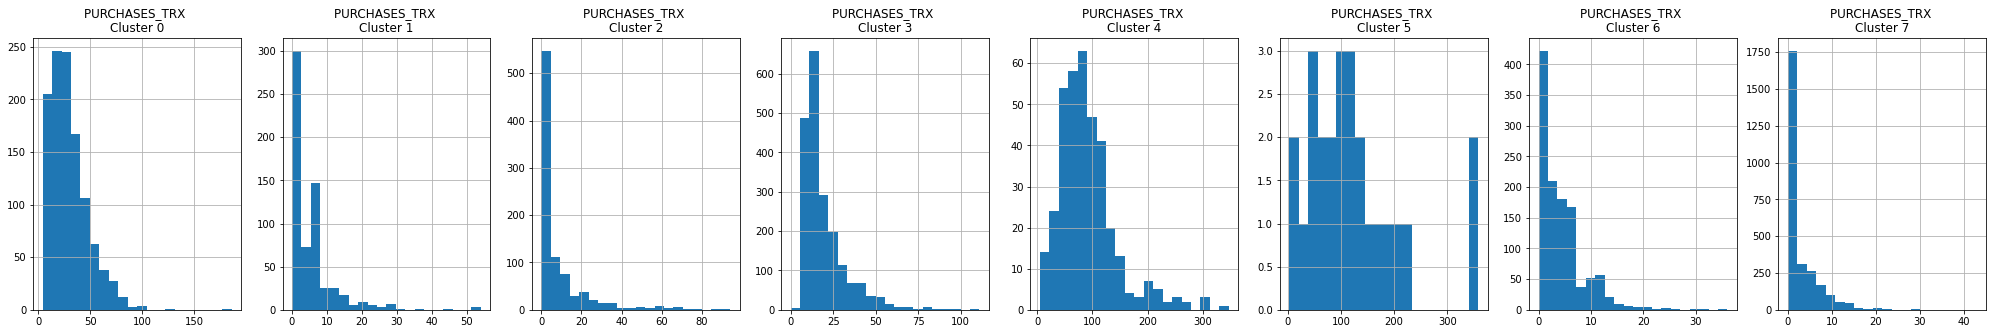

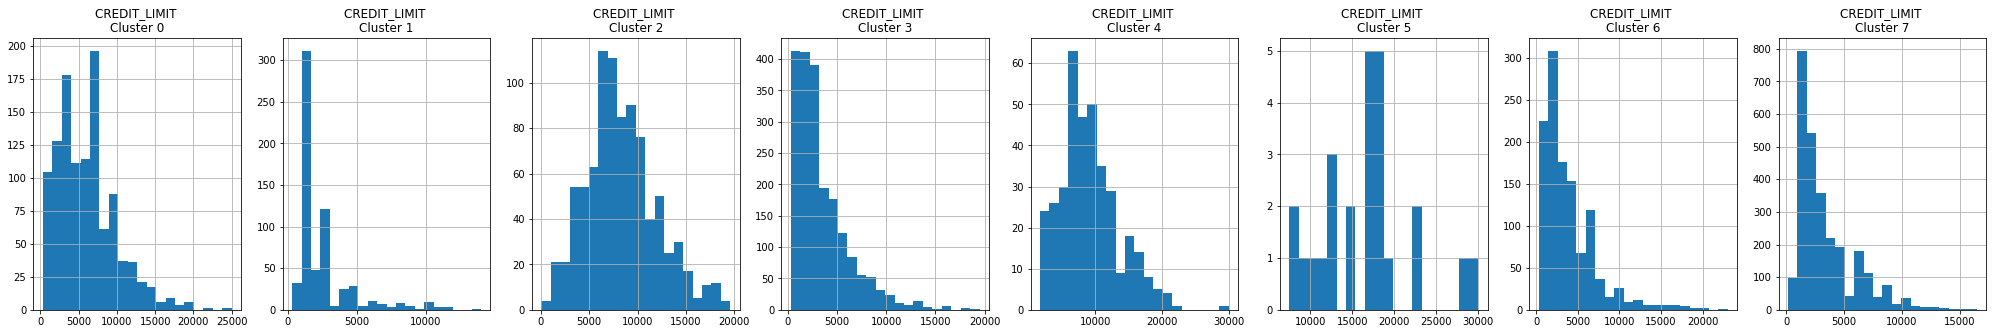

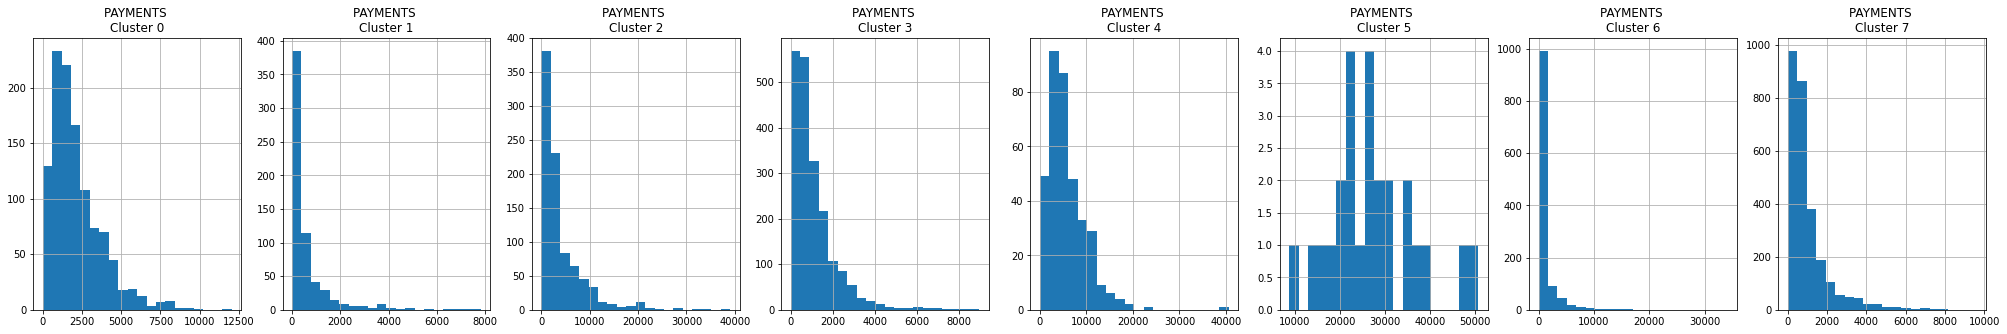

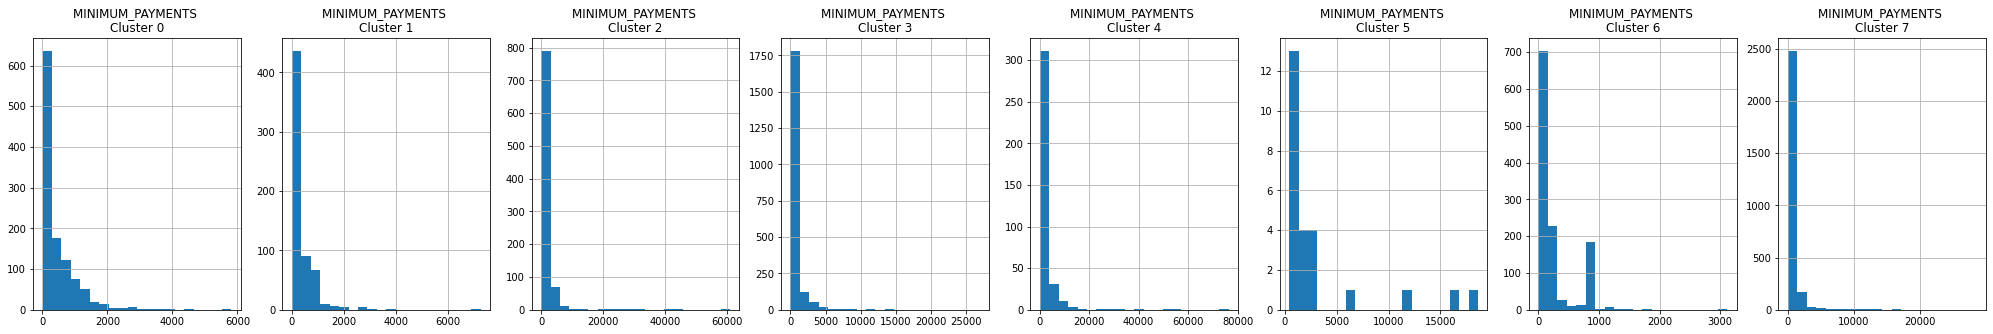

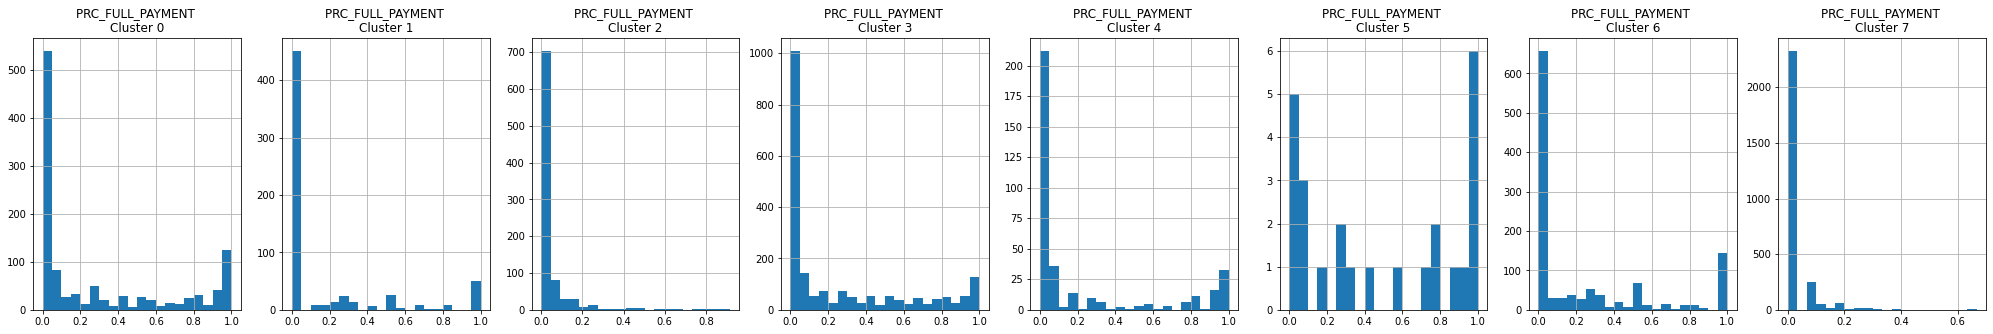

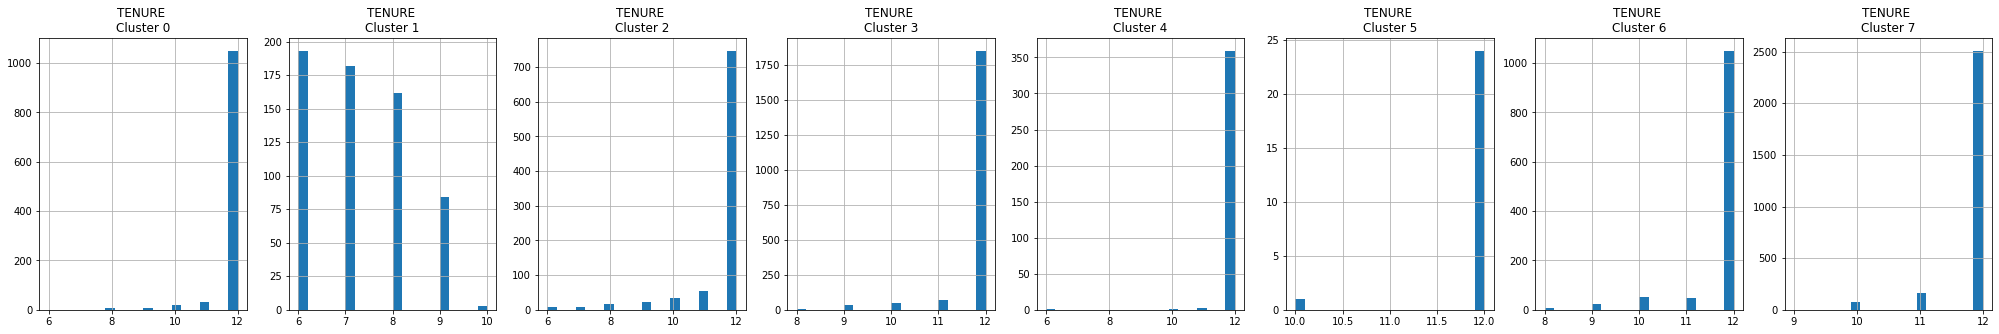

In [ ]:
# Histograms of our clusters
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = df_cluster[df_cluster['CLUSTER'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i,j))

# PART 5: Principal Component Analysis

For our second approach, we will try some dimensionality reduction with Principal Component Analysis (PCA) on our dataset to find/produce 2 components that can still describe the original dataset adequately. 

We will then attach our clusters from Part 4 to these components and visualise them so we can confirm and observe the PCA model's effeciency in preserving the information from the dataset.

**Step 1: Obtain the principal components**

In [ ]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)

In [ ]:
principal_comp

array([[-1.68221948, -1.07645414],
       [-1.13829392,  2.50648167],
       [ 0.96969095, -0.38350686],
       ...,
       [-0.9262029 , -1.81079429],
       [-2.33655266, -0.65797959],
       [-0.55642223, -0.40046044]])

**Step 2: Create a dataframe with the two components**

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1','pca2'])

In [ ]:
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076454
1,-1.138294,2.506482
2,0.969691,-0.383507
3,-0.873632,0.043173
4,-1.599431,-0.688589


**Step 3: Concatenate the cluster lables to the original dataframe**

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

In [ ]:
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076454,7
1,-1.138294,2.506482,2
2,0.969691,-0.383507,0
3,-0.873632,0.043173,7
4,-1.599431,-0.688589,7


Let's run a scatterplot of the components and categorise them per cluster.

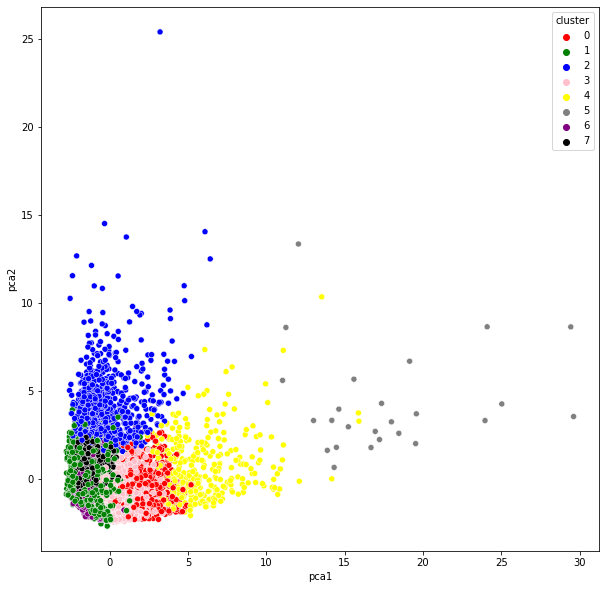

In [ ]:
plt.figure(figsize = (10 , 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red','green','blue','pink','yellow','grey','purple','black'])

We went from 17 labels to 2 components with dimensionality reduction through PCA but the new components still preserved our clustering information from our original dataset.

# PART 6: Autoencoders

For our final approach, we will apply dimensionality reduction via autoencoding on our scaled dataset. 

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [ ]:
input_df = Input(shape = (17,))

# ENCODED NETWORK
x = Dense(7,activation='relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)

# ENCODED LAYER
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

# DECODER NETWORK
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# AUTOENCODER
autoencoder = Model(input_df,decoded)

# ENCODER
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 56ms/step - loss: 0.5415
Epoch 2/25
70/70 [==============================] - 4s 55ms/step - loss: 0.2905
Epoch 3/25
70/70 [==============================] - 4s 56ms/step - loss: 0.2608
Epoch 4/25
70/70 [==============================] - 4s 55ms/step - loss: 0.2164
Epoch 5/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1704
Epoch 6/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1602
Epoch 7/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1393
Epoch 8/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1195
Epoch 9/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1154
Epoch 10/25
70/70 [==============================] - 5s 65ms/step - loss: 0.1114
Epoch 11/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1024
Epoch 12/25
70/70 [==============================] - 4s 55ms/step - loss: 0.0939
Epoch 13/25
70/70 [==================

In [ ]:
# Assign the decoded database to a variable
decoded_df = encoder.predict(df_scaled)

In [ ]:
# Preview the shape of our decoded database
decoded_df.shape

(8950, 10)

Notice how dimensionality reduction has taken our database from 17 features to 10 components.

Let's run a KMeans clustering algorithm on this new database and compare its WCSS performance with our WCSS scores from Part 4. 

Text(0, 0.5, 'Scores WCSS')

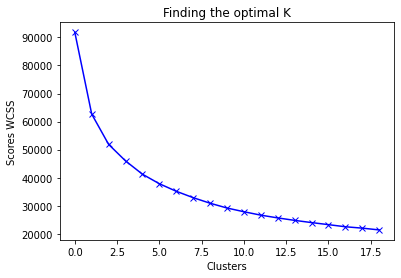

In [ ]:
# Step 1: Find an optimal number of clusters via the elbow method
scores_2 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(decoded_df)
    scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding the optimal K')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')

We can compare scores_2 with scores_1 to see if putting our data through an encoder before running the elbow method has an effect on WCSS performance.

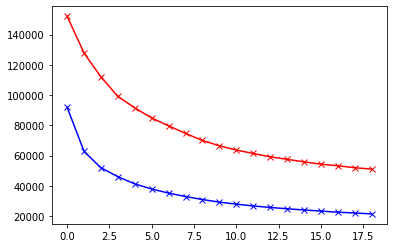

In [ ]:
# Plot scores_1 vs scores_2
plt.plot(scores_1, 'rx-')
plt.plot(scores_2, 'bx-')

Our autoencoder definitely improved our WCSS performance as evident from the plots.

At this point, we can choose an optimal K of 4 clusters from the more effecient plot - scores_2

In [ ]:
# Step 2: KMeans
kmeans = KMeans(4)
kmeans.fit(decoded_df)
labels = kmeans.labels_

In [ ]:
# Let's concatenate these new labels to our original dataframe
df_cluster_dr = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis =1)

In [ ]:
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
# To confirm that we indeed have 4 clusters now:
df_cluster_dr['CLUSTER'].unique()

array([1, 0, 2, 3], dtype=int32)

# PART 7: Cluster Analyses & Conclusions

NOTE: Text box figures in this section are subject to change everytime a runtime is restarted on the notebook.

In [ ]:
# Let's grab our different clusters and summarise them
cluster_0 = df_cluster_dr[df_cluster_dr['CLUSTER'] == 0]
cluster_1 = df_cluster_dr[df_cluster_dr['CLUSTER'] == 1]
cluster_2 = df_cluster_dr[df_cluster_dr['CLUSTER'] == 2]
cluster_3 = df_cluster_dr[df_cluster_dr['CLUSTER'] == 3]

In [ ]:
# What fraction of the entire dataset do the clusters make up for?
cluster0_pct = (len(cluster_0) / len(df)) * 100 # Cluster 0
cluster1_pct = (len(cluster_1) / len(df)) * 100 # Cluster 1
cluster2_pct = (len(cluster_2) / len(df)) * 100 # Cluster 2
cluster3_pct = (len(cluster_3) / len(df)) * 100 # Cluster 3

print('Cluster 0 percentage of dataset: {}%'.format(round(cluster0_pct, 2)))
print('Cluster 1 percentage of dataset: {}%'.format(round(cluster1_pct, 2)))
print('Cluster 2 percentage of dataset: {}%'.format(round(cluster2_pct, 2)))
print('Cluster 3 percentage of dataset: {}%'.format(round(cluster3_pct, 2)))

Cluster 0 percentage of dataset: 12.86%
Cluster 1 percentage of dataset: 69.56%
Cluster 2 percentage of dataset: 16.37%
Cluster 3 percentage of dataset: 1.21%


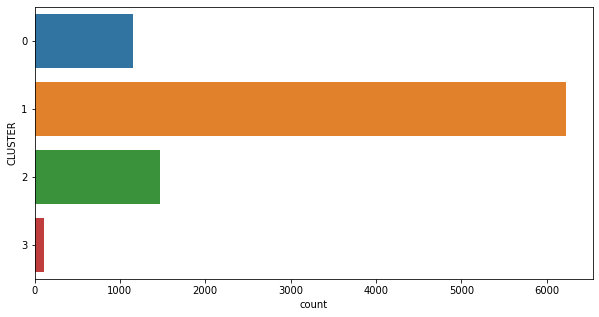

In [ ]:
# VISUALISATION
plt.figure(figsize = (10, 5))
sns.countplot(y = 'CLUSTER', data = df_cluster_dr)

Cluster 1 takes up an overwhelming share of the dataset while Cluster 2 comes in at a distant second.

Let's describe them and draw up inferences from them since they both make up the largest share of the bank's existing customer base.

In [ ]:
# CLUSTER 0
cluster_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.0
mean,1036.695090,0.854659,449.907975,271.498073,178.720368,441.136468,0.412294,0.148925,0.288137,0.087020,1.593640,8.082718,3582.529487,882.052543,584.420997,0.133793,11.656441,1.0
std,1322.924197,0.257143,571.557952,506.648594,270.990828,832.834250,0.377867,0.249912,0.363691,0.132594,2.686809,9.733166,2870.757757,913.717030,1116.583464,0.270027,1.065420,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000,1.0
25%,67.761742,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,304.663525,161.186287,0.000000,12.000000,1.0
50%,579.026640,1.000000,247.055000,0.000000,10.395000,0.000000,0.333333,0.000000,0.083333,0.000000,0.000000,5.000000,2500.000000,596.544354,263.440613,0.000000,12.000000,1.0
75%,1465.446153,1.000000,651.702500,324.225000,284.430000,492.675218,0.750000,0.166667,0.583333,0.166667,2.000000,12.000000,5000.000000,1145.227639,663.902526,0.100000,12.000000,1.0
max,9680.188434,1.000000,5080.850000,4900.000000,1986.700000,6523.780195,1.000000,1.000000,1.000000,0.900000,20.000000,76.000000,23000.000000,9614.697558,19443.453520,1.000000,12.000000,1.0


There is a noticeable disparity between the credit limit of this particular niche and all the other features that indicate purchasing activity.

Metrics that seem surprisingly low in the context of the generous credit limit for the cluster are Purchases, One Off Purchases, Installments Purchases, Cash Advance, Purchases Frequencies, Cash Advance Frequency and Cash Advance Trx.

Customers in this cluster have only accessed 20% (USD344 / USD3189) of their credit limit through cash advances.

The balance frequency of 0.9 would also suggest that customers in this cluster fund their account with personal cash or possibly advances from elsewhere, as opposed to advances from the bank itself.

Full Payment Percentages are also low. While it is important for the bank to incentivise customer borrowing and purchasing, it is just as important to ensure that customers stay credit-worthy.

In [ ]:
# CLUSTER 2
cluster_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.0
mean,1586.451867,0.934401,2917.244853,1658.210123,1259.464765,350.644762,0.914434,0.443216,0.765903,0.061929,1.159044,42.070990,5952.624573,2851.844310,971.332840,0.311667,11.361775,2.0
std,1885.539506,0.169934,2298.207550,2084.830604,1114.530606,756.922298,0.163661,0.377195,0.302944,0.112491,2.341118,37.512991,4077.763523,2329.751283,2538.296738,0.393765,1.654655,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000,0.000000,0.261984,0.000000,6.000000,2.0
25%,245.115749,1.000000,1348.080000,45.650000,451.010000,0.000000,0.916667,0.083333,0.666667,0.000000,0.000000,15.000000,2500.000000,1273.063087,176.285795,0.000000,12.000000,2.0
50%,822.755885,1.000000,2391.440000,940.510000,1069.150000,0.000000,1.000000,0.416667,0.916667,0.000000,0.000000,33.000000,5000.000000,2239.201417,297.395431,0.083333,12.000000,2.0
75%,2339.037958,1.000000,3783.250000,2438.850000,1691.010000,289.630816,1.000000,0.833333,1.000000,0.083333,1.000000,54.000000,8500.000000,3818.150760,934.885255,0.666667,12.000000,2.0
max,10822.058110,1.000000,14454.980000,14215.000000,7787.980000,7894.578816,1.000000,1.000000,1.000000,0.750000,15.000000,309.000000,25000.000000,14373.392900,50260.759470,1.000000,12.000000,2.0


This seems like a more aggressive and risk-tolerant customer niche. However, with the smaller cash advance of the two major categories, its higher purchases figure is most likely funded by personal funds or advances from elsewhere.

Regardless, the purchasing metrics are impresssive compared to Cluster 1. 

For a group with minimum average customer debt, its full payment pct metric of 42% is impressive. If a higher fraction of its purchases can be funded with cash advances, this group will make a profitable segment for the bank.

# THANK YOU!